In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.utils import resample
import os

In [62]:
# Llegim el nom dels nodes.
# Obrim el fitxer '.txt' i  llegim les linies.
with open('mindboggle_ROIs_class.txt', 'r') as file:
    header_line = file.readline().strip()

    data = []

    for line in file:
        values = line.strip().split('\t')
        data.append(values)

dict_data = dict()
for i in data:
    node=int(i[0])-1
    dict_data[str(node)] = i[1]
#dict_data

### Global Metrics

In [63]:
# Read CSV File.
#file_metrics = 'table_metrics_functional.csv'
#file_metrics = 'table_metrics_structural.csv'
file_metrics = 'table_metrics_morphological.csv'

df = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,29.803462,0.512982,0.274249,0.068408,0.881579,0.321053,0.444589,1.710526,0.002033,25.664992
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,29.485380,0.505614,0.289246,0.051992,0.486842,0.318480,0.444474,1.710526,0.002052,25.508537
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,29.903180,0.529825,0.278297,0.049126,1.434211,0.328363,0.443355,2.223684,0.000649,26.262140
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,29.678537,0.521754,0.279123,0.051653,2.118421,0.334327,0.455399,1.710526,0.001648,26.084243
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,29.681496,0.516842,0.279408,0.061446,0.000000,0.314211,0.440259,1.289474,0.000000,25.946704


In [64]:
print(f"Connexions MS: {np.mean(list(df[df['controls_ms'] == 1]['edges']))}")
print(f"Connexions HV: {np.mean(list(df[df['controls_ms'] == 0]['edges']))}")

Connexions MS: 1963.1358878435983
Connexions HV: 1877.3361203066186


* Implementa la imputació de valors nuls per assegurar-te un bon anàlisi davant les dades incompletes.

In [65]:
# Imputació de valors null
# Check which columns has null values.
for variable in df.columns:
    if df[variable].isna().any():
        print(f"Column {variable} needs imputation in NULL values.")


Column Unnamed_0 needs imputation in NULL values.
Column redcap_event_name needs imputation in NULL values.
Column age needs imputation in NULL values.
Column sex needs imputation in NULL values.
Column dd needs imputation in NULL values.
Column mstype needs imputation in NULL values.
Column dmd needs imputation in NULL values.
Column edss needs imputation in NULL values.
Column uGMSSS needs imputation in NULL values.
Column oGMSSS needs imputation in NULL values.
Column sdmt needs imputation in NULL values.
Column sdmtz needs imputation in NULL values.
Column pasat needs imputation in NULL values.
Column zpasat needs imputation in NULL values.
Column zverbalmemory needs imputation in NULL values.
Column zvisualmemory needs imputation in NULL values.
Column zattention needs imputation in NULL values.
Column zfluency needs imputation in NULL values.
Column zglobal needs imputation in NULL values.
Column FA needs imputation in NULL values.
Column GM needs imputation in NULL values.
Colum

In [66]:
# Summary of all columns
df.describe()

,Var1,Unnamed_0,controls_ms,age,sex,dd,mstype,dmd,edss,uGMSSS,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
count,265.000000,165.000000,265.000000,165.000000,165.000000,165.000000,165.000000,146.000000,165.000000,147.000000,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,132.000000,82.000000,0.554717,46.161529,0.278788,14.110788,0.060606,2.527397,2.369697,3.031156,...,29.831190,0.501446,0.278538,0.072731,2.326713,0.325316,0.446393,1.801490,0.001365,25.334849
std,76.643112,47.775517,0.497937,10.602227,0.449768,10.051942,0.591577,3.167062,1.802689,2.008814,...,0.738001,0.023788,0.008211,0.020060,1.763379,0.012908,0.008828,0.348205,0.001657,0.727439
min,0.000000,0.000000,0.000000,22.660000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.490000,...,28.523520,0.420351,0.238488,0.023860,0.000000,0.305205,0.412206,1.289474,0.000000,23.116782
25%,66.000000,41.000000,0.000000,38.210000,0.000000,7.750000,0.000000,0.000000,1.500000,1.415000,...,29.319494,0.474386,0.273622,0.056230,0.894737,0.313377,0.439543,1.657895,0.000544,24.534260
50%,132.000000,82.000000,1.000000,46.330000,0.000000,12.400000,0.000000,1.000000,2.000000,2.530000,...,29.707871,0.515439,0.279395,0.069660,1.776316,0.323216,0.444829,1.710526,0.000938,25.667729
75%,198.000000,123.000000,1.000000,53.840000,1.000000,19.600000,0.000000,4.750000,3.000000,4.395000,...,30.156347,0.522105,0.284029,0.089661,3.381579,0.336813,0.454171,2.144737,0.001608,25.961842
max,264.000000,164.000000,1.000000,72.220000,1.000000,46.130000,2.000000,14.000000,7.500000,9.290000,...,32.669294,0.530877,0.299483,0.119599,8.210526,0.353085,0.465826,2.447368,0.016447,26.371286


In [67]:
# Select the required columns.
columns_x = ['age', 'sex', 'edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity', 'transitivity', 'strength']

# Fill missing values using the mean().
#df.fillna(df.mean(), inplace=True)

X = df[columns_x]
X.head()

,age,sex,edges,degree,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,51.53,1.0,1950.009769,19.263158,29.803462,0.512982,0.274249,0.068408,0.881579,0.321053,0.444589,1.710526,0.002033,25.664992
1,58.06,0.0,1938.153594,19.000000,29.485380,0.505614,0.289246,0.051992,0.486842,0.318480,0.444474,1.710526,0.002052,25.508537
2,60.78,1.0,1995.785393,19.881579,29.903180,0.529825,0.278297,0.049126,1.434211,0.328363,0.443355,2.223684,0.000649,26.262140
3,37.95,0.0,1981.889576,19.605263,29.678537,0.521754,0.279123,0.051653,2.118421,0.334327,0.455399,1.710526,0.001648,26.084243
4,52.64,0.0,1971.949480,19.381579,29.681496,0.516842,0.279408,0.061446,0.000000,0.314211,0.440259,1.289474,0.000000,25.946704


In [68]:
y = df['controls_ms']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: controls_ms, dtype: int64

In [69]:
df_HV = df[df['controls_ms'] == 0]
df_MS = df[df['controls_ms'] == 1]


In [70]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics = list()
list_bonferroni_correction = dict()
num_matrius = len(df)

for metric in ['edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity','transitivity', 'strength']:
    dades_HV = df[df['controls_ms'] == 0][metric]
    dades_MS = df[df['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction[metric] = pval_corrected   
        list_significative_metrics.append(metric)
        

Metric: edges pvalue: 2.0183040231956127e-27
Metric: degree pvalue: 3.5797255899685576e-27
Metric: max_degree pvalue: 1.975030138058924e-15
Metric: density pvalue: 1.6633829589767736e-27
Metric: clustering_coef pvalue: 1.6533768759754124e-09
Metric: assortativity pvalue: 1.5021288587998778e-27
Metric: betw_centr pvalue: 0.0007717720081875149
Metric: eglob pvalue: 2.789704921837439e-25
Metric: eloc pvalue: 6.692895433297911e-25
Metric: modularity pvalue: 0.005959607070207428
Metric: strength pvalue: 1.945213867958829e-27


In [71]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction.keys())

['edges',
 'degree',
 'max_degree',
 'density',
 'clustering_coef',
 'assortativity',
 'betw_centr',
 'eglob',
 'eloc',
 'modularity',
 'strength']

In [72]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction.keys()):
    mean_MS_ = np.mean(df_MS[metric])
    std_MS_ = np.std(df_MS[metric])
    
    mean_HV_ = np.mean(df_MS[metric])
    std_HV_ = np.std(df_MS[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - edges: MS: 1963.1358878435983 (30.745567740522432), HV: 1963.1358878435983 (30.745567740522432), Pvalue: 2.0183040231956127e-27 

Metric - degree: MS: 19.481740064446836 (0.3826637079944235), HV: 19.481740064446836 (0.3826637079944235), Pvalue: 3.5797255899685576e-27 

Metric - max_degree: MS: 30.143859738200906 (0.710584090475375), HV: 30.143859738200906 (0.710584090475375), Pvalue: 1.975030138058924e-15 

Metric - density: MS: 0.5185368182360662 (0.010711766872302107), HV: 0.5185368182360662 (0.010711766872302107), Pvalue: 1.6633829589767736e-27 

Metric - clustering_coef: MS: 0.2811298850280794 (0.007991358206912583), HV: 0.2811298850280794 (0.007991358206912583), Pvalue: 1.6533768759754124e-09 

Metric - assortativity: MS: 0.059865644702909435 (0.01079986638403806), HV: 0.059865644702909435 (0.01079986638403806), Pvalue: 1.5021288587998778e-27 

Metric - betw_centr: MS: 2.8394199785177223 (1.9081419144151877), HV: 2.83941

In [73]:
#list_significative_metrics.append('sex')
#list_significative_metrics.append('age')

# Llistat a utilitzar per aplicar models ML.
print(list(list_significative_metrics))

['edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity', 'strength']


Training set - Features: (212, 11), Labels: (212,)
Testing set - Features: (53, 11) Labels: (53,)


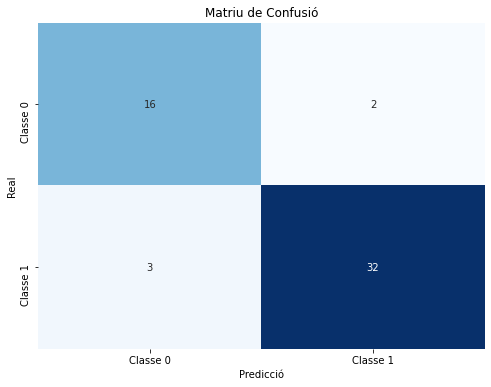

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.94      0.91      0.93        35

    accuracy                           0.91        53
   macro avg       0.89      0.90      0.90        53
weighted avg       0.91      0.91      0.91        53



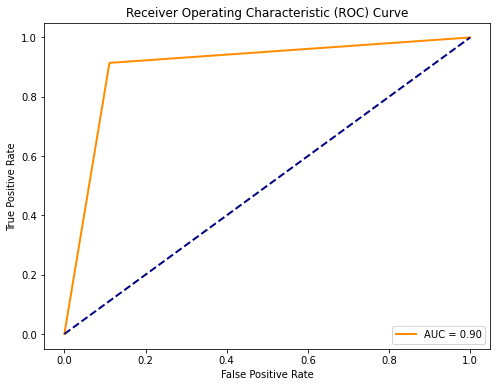

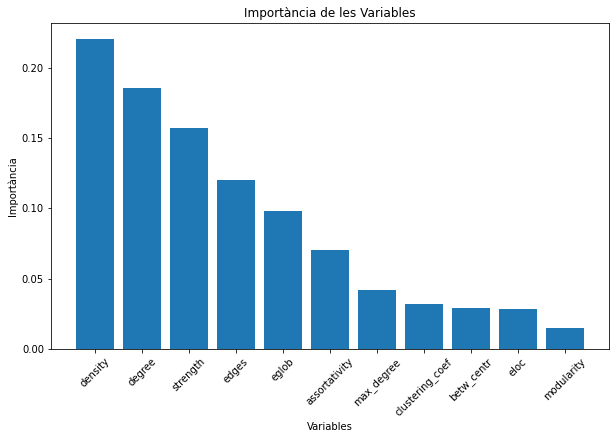

In [74]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Support Vector Machine**

Training set - Features: (212, 11), Labels: (212,)
Testing set - Features: (53, 11) Labels: (53,)


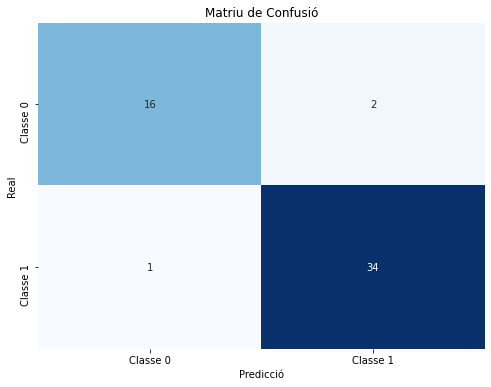

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.96        35

    accuracy                           0.94        53
   macro avg       0.94      0.93      0.94        53
weighted avg       0.94      0.94      0.94        53



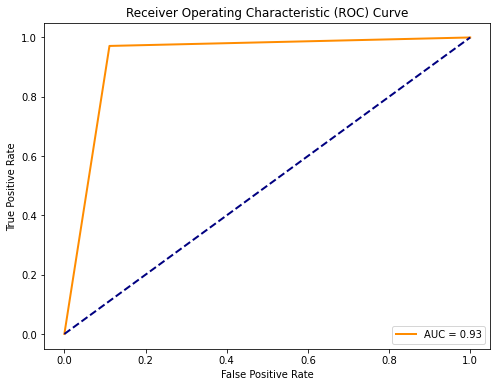

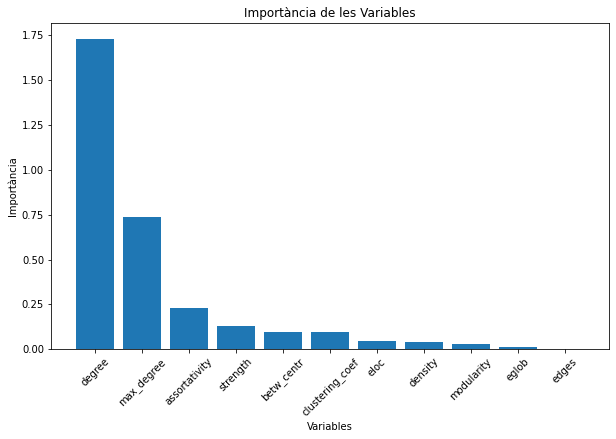

In [75]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: KNN**

Training set - Features: (212, 11), Labels: (212,)
Testing set - Features: (53, 11) Labels: (53,)


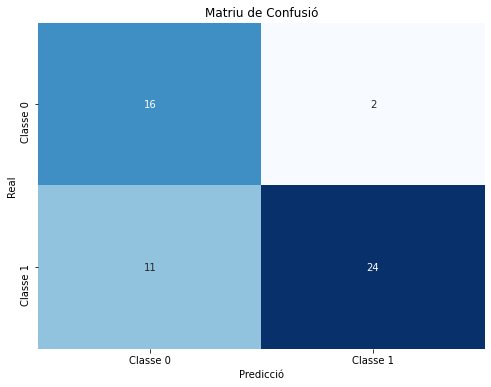

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        18
           1       0.92      0.69      0.79        35

    accuracy                           0.75        53
   macro avg       0.76      0.79      0.75        53
weighted avg       0.81      0.75      0.76        53



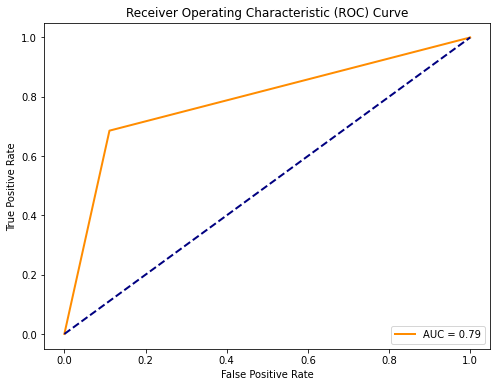

In [76]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Global: Logistic Regression**

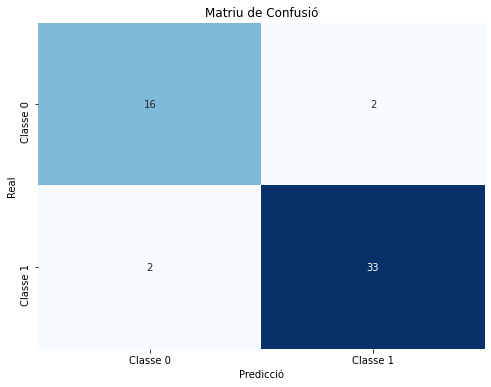

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.94      0.94      0.94        35

    accuracy                           0.92        53
   macro avg       0.92      0.92      0.92        53
weighted avg       0.92      0.92      0.92        53



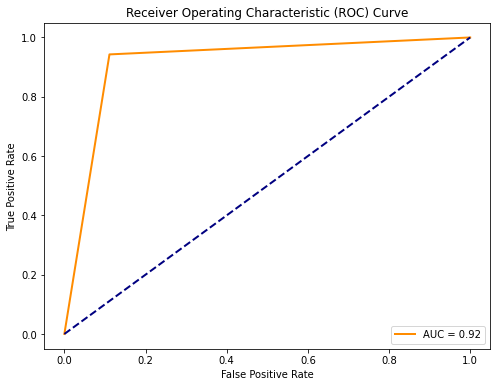

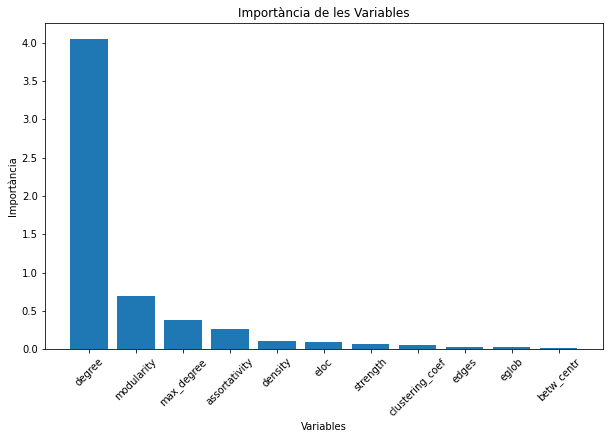

In [77]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Gaussian Naive Bayes**

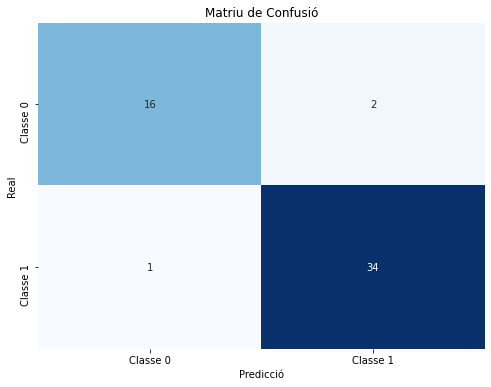

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.96        35

    accuracy                           0.94        53
   macro avg       0.94      0.93      0.94        53
weighted avg       0.94      0.94      0.94        53



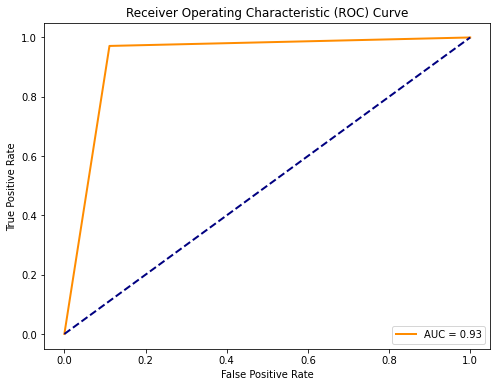

In [78]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Local Metrics

In [79]:
# Read CSV File.
#file_metrics = 'table_metrics_local_functional.csv'
#file_metrics = 'table_metrics_local_structural.csv'
file_metrics = 'table_metrics_local_morphological.csv'

df_local = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df_local.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,modularity_66,modularity_67,modularity_68,modularity_69,modularity_70,modularity_71,modularity_72,modularity_73,modularity_74,modularity_75
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,2,2,2,2,2,2,2,2,2,2
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,2,2,2,2,2,2,2,2,2,2
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,2,2,2,2,2,2,2,2,2,2
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,2,2,2,2,2,2,2,2,2,2
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,1,1,1,1,1,1,1,1,1,1


In [80]:
# Obtenim el llistat de mètriques locals.
# Get index of 'degree_0'.
index_of_degree0 = df_local.columns.get_loc('degree_0')
list_local_metrics = list(df_local.columns)[index_of_degree0:]


In [81]:
df_MS_local = df_local[df_local['controls_ms'] == 1]
df_HV_local = df_local[df_local['controls_ms'] == 0]

In [82]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics_local = list()
list_bonferroni_correction_local = dict()
num_matrius = len(df)

for metric in list_local_metrics:
    dades_HV = df_local[df_local['controls_ms'] == 0][metric]
    dades_MS = df_local[df_local['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction_local[metric] = pval_corrected   
        list_significative_metrics_local.append(metric)
        

Metric: degree_0 pvalue: 0.002664742432693715
Metric: degree_9 pvalue: 2.8186468403243087e-06
Metric: degree_10 pvalue: 4.935923543999801e-12
Metric: degree_11 pvalue: 7.1208976556719445e-09
Metric: degree_12 pvalue: 3.896388321384274e-10
Metric: degree_13 pvalue: 1.345452654960837e-26
Metric: degree_14 pvalue: 1.5329579864861502e-16
Metric: degree_15 pvalue: 2.690425112576574e-19
Metric: degree_16 pvalue: 2.791644311893326e-15
Metric: degree_17 pvalue: 1.5616451266759776e-19
Metric: degree_18 pvalue: 7.44467076634145e-16
Metric: degree_19 pvalue: 1.8679529890471743e-12
Metric: degree_20 pvalue: 3.048475034472506e-11
Metric: degree_22 pvalue: 9.643035147555621e-09
Metric: degree_23 pvalue: 3.4977258161053265e-17
Metric: degree_24 pvalue: 2.258141724705784e-17
Metric: degree_25 pvalue: 8.374444379602223e-09
Metric: degree_26 pvalue: 2.8819279319572187e-34
Metric: degree_27 pvalue: 1.9247138380970816e-32
Metric: degree_28 pvalue: 1.0629006599317759e-18
Metric: degree_29 pvalue: 6.7474114

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: degree_54 pvalue: 8.51038796272692e-05
Metric: degree_55 pvalue: 1.1942952430916957e-16
Metric: degree_56 pvalue: 2.740073386633869e-29
Metric: degree_57 pvalue: 2.5232885666744004e-27
Metric: degree_58 pvalue: 4.11197562101394e-28
Metric: degree_59 pvalue: 1.6112539750952504e-32
Metric: degree_60 pvalue: 7.827356551230427e-26
Metric: degree_61 pvalue: 2.610538143518668e-34
Metric: degree_62 pvalue: 1.0966213435382361e-27
Metric: degree_63 pvalue: 4.101701429028217e-32
Metric: degree_64 pvalue: 6.316856456648635e-28
Metric: degree_65 pvalue: 2.0058902490129684e-27
Metric: degree_66 pvalue: 1.2732024888885893e-19
Metric: degree_67 pvalue: 3.284574352235504e-16
Metric: degree_68 pvalue: 8.035580835854454e-22
Metric: degree_69 pvalue: 5.956091328513734e-17
Metric: degree_70 pvalue: 1.5032616353388886e-07
Metric: degree_71 pvalue: 3.319594041206095e-30
Metric: degree_72 pvalue: 1.048874174050448e-21
Metric: degree_73 pvalue: 3.031582669218634e-16
Metric: degree_74 pvalue: 1.1879712

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: betw_centr_51 pvalue: 0.012790843141134461
Metric: betw_centr_53 pvalue: 0.047963537611037055
Metric: betw_centr_54 pvalue: 2.4075912312546187e-07
Metric: betw_centr_55 pvalue: 0.0004928051519530634
Metric: betw_centr_57 pvalue: 0.00022848923069599268
Metric: betw_centr_64 pvalue: 0.00017115451283113384
Metric: betw_centr_66 pvalue: 1.4353236355477967e-07
Metric: betw_centr_67 pvalue: 6.228111375943899e-07
Metric: betw_centr_69 pvalue: 5.046773534952267e-05
Metric: betw_centr_70 pvalue: 1.4403244627172812e-22
Metric: betw_centr_71 pvalue: 1.670791069307595e-16
Metric: betw_centr_72 pvalue: 4.224647428022256e-13
Metric: betw_centr_73 pvalue: 2.24575596623417e-12
Metric: eigenv_centr_0 pvalue: 1.0352392884707039e-12
Metric: eigenv_centr_1 pvalue: 4.0699635577458415e-13
Metric: eigenv_centr_2 pvalue: 8.116966290332537e-09
Metric: eigenv_centr_3 pvalue: 6.440182527948938e-11
Metric: eigenv_centr_4 pvalue: 2.034251774604073e-12
Metric: eigenv_centr_5 pvalue: 3.2907182267476e-11
Metr

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: pager_centr_9 pvalue: 8.48267803917691e-09
Metric: pager_centr_10 pvalue: 0.0009282353672937362
Metric: pager_centr_11 pvalue: 5.115383984395351e-09
Metric: pager_centr_13 pvalue: 1.6667629307122912e-18
Metric: pager_centr_15 pvalue: 8.253734439553752e-10
Metric: pager_centr_16 pvalue: 8.259249058633498e-05
Metric: pager_centr_17 pvalue: 9.734080916676421e-17
Metric: pager_centr_18 pvalue: 5.470942225080508e-06
Metric: pager_centr_19 pvalue: 2.7499800269796003e-13
Metric: pager_centr_20 pvalue: 4.158217784942096e-07
Metric: pager_centr_21 pvalue: 0.01722958011095567
Metric: pager_centr_23 pvalue: 5.559827996279792e-05
Metric: pager_centr_24 pvalue: 3.048112816881035e-11
Metric: pager_centr_26 pvalue: 2.2273647886091524e-07
Metric: pager_centr_27 pvalue: 0.0011013870601899978
Metric: pager_centr_28 pvalue: 6.404109385078496e-08
Metric: pager_centr_30 pvalue: 6.898336566973883e-07
Metric: pager_centr_31 pvalue: 5.409401509083069e-13
Metric: pager_centr_38 pvalue: 1.12709209715920

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: clust_coef_0 pvalue: 1.6724035269385748e-05
Metric: clust_coef_1 pvalue: 8.842931377542462e-05
Metric: clust_coef_2 pvalue: 2.760168803307794e-22
Metric: clust_coef_4 pvalue: 6.966686266564564e-07
Metric: clust_coef_5 pvalue: 1.8407477102687757e-10
Metric: clust_coef_6 pvalue: 3.131724292517451e-23
Metric: clust_coef_8 pvalue: 1.354588442238529e-26
Metric: clust_coef_9 pvalue: 0.016315371359197216
Metric: clust_coef_10 pvalue: 0.011089758852655448
Metric: clust_coef_11 pvalue: 3.8868979622386024e-11
Metric: clust_coef_12 pvalue: 2.1707919057696635e-26
Metric: clust_coef_13 pvalue: 4.5372969430813955e-20
Metric: clust_coef_14 pvalue: 4.1874509662244918e-22
Metric: clust_coef_15 pvalue: 2.9135675934528076e-12
Metric: clust_coef_16 pvalue: 0.004265374922208773
Metric: clust_coef_17 pvalue: 2.2280847646474086e-13
Metric: clust_coef_18 pvalue: 3.5277212438726347e-13
Metric: clust_coef_21 pvalue: 6.534828984903402e-27
Metric: clust_coef_22 pvalue: 3.665786780686407e-26
Metric: clust_

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: clust_coef_55 pvalue: 2.048646389208968e-06
Metric: clust_coef_57 pvalue: 0.023188410015034102
Metric: clust_coef_66 pvalue: 6.764223586130537e-13
Metric: clust_coef_67 pvalue: 3.709402707494609e-15
Metric: clust_coef_69 pvalue: 0.001171708375265119
Metric: clust_coef_70 pvalue: 9.172153997360438e-07
Metric: local_ef_0 pvalue: 1.5019645226002588e-20
Metric: local_ef_1 pvalue: 0.0006165755350302917
Metric: local_ef_2 pvalue: 7.648405794382693e-14
Metric: local_ef_5 pvalue: 4.1234457824473997e-14
Metric: local_ef_6 pvalue: 8.773854406956194e-21
Metric: local_ef_8 pvalue: 5.296047248893537e-24
Metric: local_ef_10 pvalue: 6.648998981669405e-06
Metric: local_ef_12 pvalue: 1.5107525230847587e-25
Metric: local_ef_13 pvalue: 1.6771765978745955e-13
Metric: local_ef_14 pvalue: 4.611358778343937e-24
Metric: local_ef_15 pvalue: 2.0413482121112883e-12
Metric: local_ef_16 pvalue: 0.0022051048483993263
Metric: local_ef_19 pvalue: 9.240449013623748e-12
Metric: local_ef_20 pvalue: 0.00667365280

In [83]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction_local.keys())

['degree_0',
 'degree_9',
 'degree_10',
 'degree_11',
 'degree_12',
 'degree_13',
 'degree_14',
 'degree_15',
 'degree_16',
 'degree_17',
 'degree_18',
 'degree_19',
 'degree_20',
 'degree_22',
 'degree_23',
 'degree_24',
 'degree_25',
 'degree_26',
 'degree_27',
 'degree_28',
 'degree_29',
 'degree_30',
 'degree_31',
 'degree_32',
 'degree_33',
 'degree_34',
 'degree_35',
 'degree_36',
 'degree_37',
 'degree_38',
 'degree_39',
 'degree_40',
 'degree_41',
 'degree_42',
 'degree_43',
 'degree_44',
 'degree_45',
 'degree_46',
 'degree_47',
 'degree_48',
 'degree_49',
 'degree_50',
 'degree_51',
 'degree_52',
 'degree_53',
 'degree_54',
 'degree_55',
 'degree_56',
 'degree_57',
 'degree_58',
 'degree_59',
 'degree_60',
 'degree_61',
 'degree_62',
 'degree_63',
 'degree_64',
 'degree_65',
 'degree_66',
 'degree_67',
 'degree_68',
 'degree_69',
 'degree_70',
 'degree_71',
 'degree_72',
 'degree_73',
 'degree_74',
 'degree_75',
 'betw_centr_0',
 'betw_centr_11',
 'betw_centr_13',
 'betw_cent

In [84]:
len(list_bonferroni_correction_local)

330

In [85]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction_local.keys()):
    mean_MS_ = np.mean(df_MS_local[metric])
    std_MS_ = np.std(df_MS_local[metric])
    
    mean_HV_ = np.mean(df_MS_local[metric])
    std_HV_ = np.std(df_MS_local[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction_local[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree_0: MS: 2.7823129251700682 (2.142911132026924), HV: 2.7823129251700682 (2.142911132026924), Pvalue: 0.002664742432693715 

Metric - degree_9: MS: 9.0 (0.0), HV: 9.0 (0.0), Pvalue: 2.8186468403243087e-06 

Metric - degree_10: MS: 9.965986394557824 (0.18126411693162214), HV: 9.965986394557824 (0.18126411693162214), Pvalue: 4.935923543999801e-12 

Metric - degree_11: MS: 10.97278911564626 (0.1626974250762095), HV: 10.97278911564626 (0.1626974250762095), Pvalue: 7.1208976556719445e-09 

Metric - degree_12: MS: 11.986394557823129 (0.11584616575460135), HV: 11.986394557823129 (0.11584616575460135), Pvalue: 3.896388321384274e-10 

Metric - degree_13: MS: 12.863945578231293 (0.656101201152625), HV: 12.863945578231293 (0.656101201152625), Pvalue: 1.345452654960837e-26 

Metric - degree_14: MS: 13.884353741496598 (0.3404080545087565), HV: 13.884353741496598 (0.3404080545087565), Pvalue: 1.5329579864861502e-16 

Metric - degree_15


Metric - betw_centr_57: MS: 2.6564968788642984 (3.8662804813143397), HV: 2.6564968788642984 (3.8662804813143397), Pvalue: 0.00022848923069599268 

Metric - betw_centr_64: MS: 0.14023053213158534 (0.2874408355513079), HV: 0.14023053213158534 (0.2874408355513079), Pvalue: 0.00017115451283113384 

Metric - betw_centr_66: MS: 0.4843811127289054 (0.8150654766766998), HV: 0.4843811127289054 (0.8150654766766998), Pvalue: 1.4353236355477967e-07 

Metric - betw_centr_67: MS: 0.339329703713247 (0.6095748693052252), HV: 0.339329703713247 (0.6095748693052252), Pvalue: 6.228111375943899e-07 

Metric - betw_centr_69: MS: 0.13897248066156168 (0.3261681615276559), HV: 0.13897248066156168 (0.3261681615276559), Pvalue: 5.046773534952267e-05 

Metric - betw_centr_70: MS: 0.04497907014956629 (0.5212866765780403), HV: 0.04497907014956629 (0.5212866765780403), Pvalue: 1.4403244627172812e-22 

Metric - betw_centr_71: MS: 0.016666931872696918 (0.1958948499910114), HV: 0.016666931872696918 (0.1958948499910114


Metric - pager_centr_30: MS: 0.01036765088305066 (0.014284127902887276), HV: 0.01036765088305066 (0.014284127902887276), Pvalue: 6.898336566973883e-07 

Metric - pager_centr_31: MS: 0.002125304802247343 (0.0003400313018523845), HV: 0.002125304802247343 (0.0003400313018523845), Pvalue: 5.409401509083069e-13 

Metric - pager_centr_38: MS: 0.002075293619543687 (0.0003374755243876578), HV: 0.002075293619543687 (0.0003374755243876578), Pvalue: 1.1270920971592066e-18 

Metric - pager_centr_50: MS: 0.0035044561967308464 (0.0005573247504890625), HV: 0.0035044561967308464 (0.0005573247504890625), Pvalue: 0.0021894924906795303 

Metric - pager_centr_51: MS: 0.003724601705638373 (0.0006066427985176998), HV: 0.003724601705638373 (0.0006066427985176998), Pvalue: 4.0283734133614834e-05 

Metric - pager_centr_57: MS: 0.004051399757069313 (0.0006451960506978872), HV: 0.004051399757069313 (0.0006451960506978872), Pvalue: 0.00018390090400649737 

Metric - clust_coef_0: MS: 0.9153038063974529 (0.0270593


Metric - local_ef_39: MS: 0.4962900007908881 (0.041082260607885744), HV: 0.4962900007908881 (0.041082260607885744), Pvalue: 3.933913768841855e-32 

Metric - local_ef_40: MS: 0.4964315490505967 (0.04108853464901615), HV: 0.4964315490505967 (0.04108853464901615), Pvalue: 2.0599481503296757e-33 

Metric - local_ef_41: MS: 0.4964545153653405 (0.04109775009140305), HV: 0.4964545153653405 (0.04109775009140305), Pvalue: 1.8947404023733695e-35 

Metric - local_ef_42: MS: 0.49987932308251737 (0.0005922631578483698), HV: 0.49987932308251737 (0.0005922631578483698), Pvalue: 9.787202716040295e-38 

Metric - local_ef_43: MS: 0.49985644125173845 (0.0006345650219109345), HV: 0.49985644125173845 (0.0006345650219109345), Pvalue: 4.5624581694832396e-36 

Metric - local_ef_44: MS: 0.49291996992033527 (0.057907132443338324), HV: 0.49291996992033527 (0.057907132443338324), Pvalue: 1.2573908779615581e-33 

Metric - local_ef_45: MS: 0.4965500485908649 (0.04109638770023735), HV: 0.4965500485908649 (0.0410963

Metric - strength_27: MS: 28.10665492337225 (1.1449188459573194), HV: 28.10665492337225 (1.1449188459573194), Pvalue: 1.4691293016175782e-15 

Metric - strength_28: MS: 28.03889530648256 (0.8325252180112866), HV: 28.03889530648256 (0.8325252180112866), Pvalue: 1.3809855316691083e-16 

Metric - strength_29: MS: 28.085713743961765 (2.9216176070098987), HV: 28.085713743961765 (2.9216176070098987), Pvalue: 8.703934082096796e-21 

Metric - strength_30: MS: 28.127276757728378 (0.7594999360481564), HV: 28.127276757728378 (0.7594999360481564), Pvalue: 1.7992457046142106e-18 

Metric - strength_31: MS: 28.413090654210787 (2.4724252198339602), HV: 28.413090654210787 (2.4724252198339602), Pvalue: 3.5277212438726347e-13 

Metric - strength_32: MS: 28.25005832415267 (2.542804672490293), HV: 28.25005832415267 (2.542804672490293), Pvalue: 1.4842905083832023e-25 

Metric - strength_33: MS: 28.1483362616552 (2.7767838644609437), HV: 28.1483362616552 (2.7767838644609437), Pvalue: 7.716727467541483e-18 


* **Local: Random Forest Classifier**

Training set - Features: (212, 330), Labels: (212,)
Testing set - Features: (53, 330) Labels: (53,)


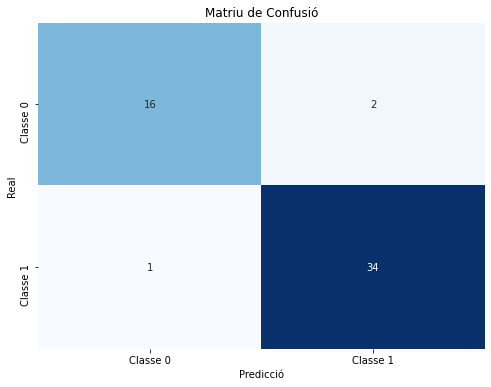

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.96        35

    accuracy                           0.94        53
   macro avg       0.94      0.93      0.94        53
weighted avg       0.94      0.94      0.94        53



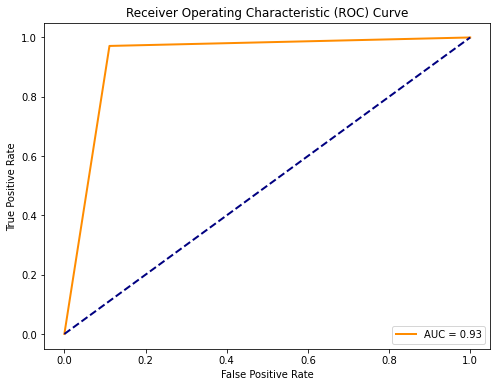

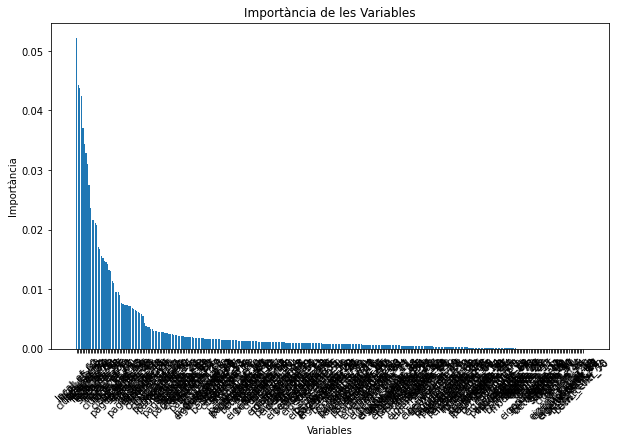

In [86]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Support Vector Machine (SVM)**

Training set - Features: (212, 330), Labels: (212,)
Testing set - Features: (53, 330) Labels: (53,)


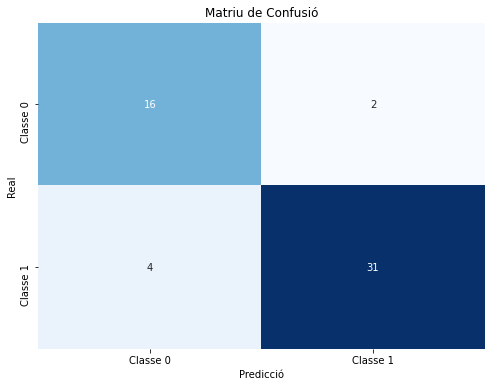

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.94      0.89      0.91        35

    accuracy                           0.89        53
   macro avg       0.87      0.89      0.88        53
weighted avg       0.89      0.89      0.89        53



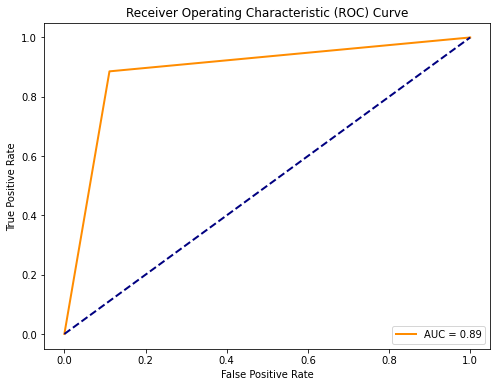

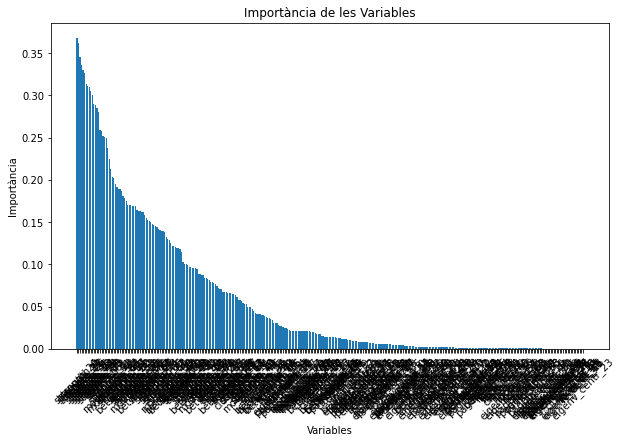

In [87]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: KNN** 

Training set - Features: (212, 330), Labels: (212,)
Testing set - Features: (53, 330) Labels: (53,)


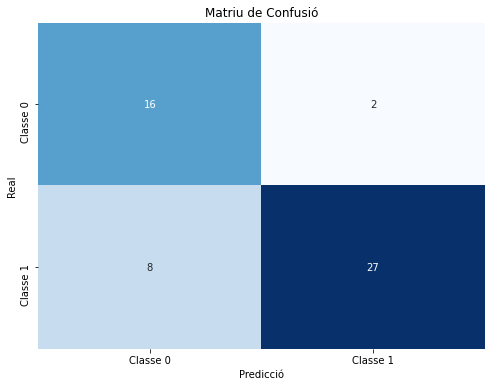

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.93      0.77      0.84        35

    accuracy                           0.81        53
   macro avg       0.80      0.83      0.80        53
weighted avg       0.84      0.81      0.82        53



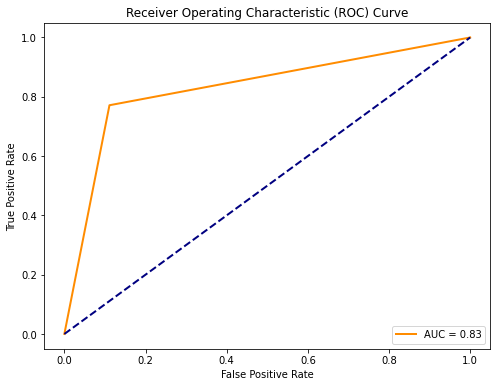

In [88]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Local: Logistic regression**

/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


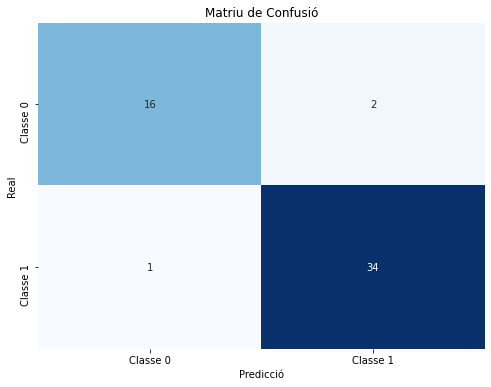

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.96        35

    accuracy                           0.94        53
   macro avg       0.94      0.93      0.94        53
weighted avg       0.94      0.94      0.94        53



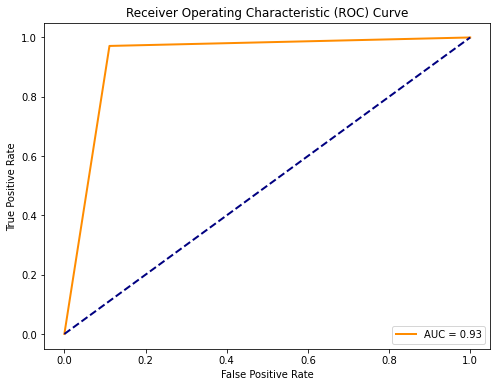

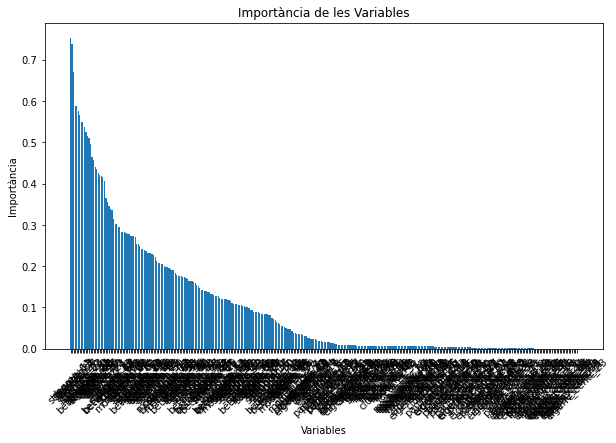

In [89]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Gaussian Naive Bayes (GNB)**

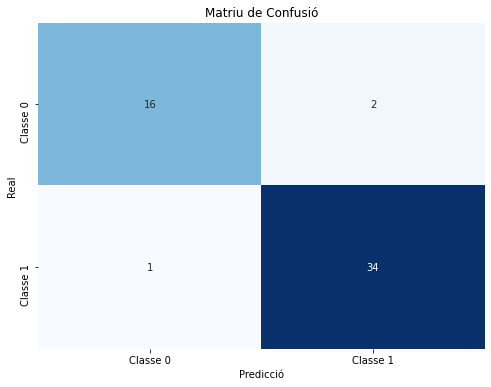

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.96        35

    accuracy                           0.94        53
   macro avg       0.94      0.93      0.94        53
weighted avg       0.94      0.94      0.94        53



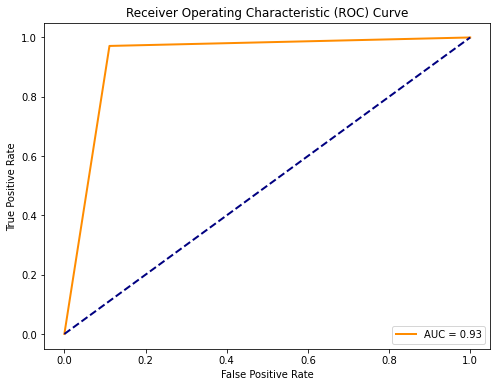

In [90]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* Clinical and demographic characteristics of the subjects included in the study.

In [42]:
# Construct Table 1 (Clinic and demographic characteristics of the subjects).

demographic_features_variables = ['sex', 'age']
demographic_features_variables_dict = dict()

for var in demographic_features_variables:
    dades_HV = df_HV[var]
    dades_MS = df_MS[var]

    normalitat_HV = check_normality(dades_HV, 0.05)
    normalitat_MS = check_normality(dades_MS, 0.05)
    
    if normalitat_HV and normalitat_MS:
        _, pvalue_t = ttest_ind(dades_HV, dades_MS)
        #print("pvalue_t:", pvalue_t)
        demographic_features_variables_dict[var] = pvalue_t
    
    # Prova mostres independents.
    else:
        _, pvalue_u = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
        #print("pvalue_u:", pvalue_u)
        demographic_features_variables_dict[var] = pvalue_u
        

In [43]:
# RRMS: 0, SPMS: 1, PPMS (2)
RRMS = df_MS[df_MS['mstype'] == 0].count()['mstype']
SPMS = df_MS[df_MS['mstype'] == 1].count()['mstype']
PPMS = df_MS[df_MS['mstype'] == 2].count()['mstype']

perc_RRMS = RRMS/len(list(df_MS['mstype']))
perc_SPMS = SPMS/len(list(df_MS['mstype']))
perc_PPMS = PPMS/len(list(df_MS['mstype']))


In [44]:
# Obtenim la mitjana de volum de tots els nodes Controls.
# Llegir excel.
volum_df_HV = pd.read_excel('VOLUM_NODES_CONTROLS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_HV = volum_df_HV.mean()
avg_volum_HV = column_avg_HV.mean()
std_volum_HV = column_avg_HV.std()


# Obtenim la mitjana de volum de tots els nodes MS.
# Llegir excel.
volum_df_MS = pd.read_excel('VOLUM_NODES_PATIENTS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_MS = volum_df_MS.mean()
avg_volum_MS = column_avg_MS.mean()
std_volum_MS = column_avg_MS.std()

# Comprovem la normalitat i calculem el pvalue.
dades_HV = column_avg_HV
dades_MS = column_avg_MS

normalitat_HV = check_normality(dades_HV, 0.05)
normalitat_MS = check_normality(dades_MS, 0.05)

if normalitat_HV and normalitat_MS:
    _, pvalue_volum = ttest_ind(dades_HV, dades_MS)
    print("pvalue_t:", pvalue_volum)

# Prova mostres independents.
else:
    _, pvalue_volum = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    print("pvalue_u:", pvalue_volum)
    

pvalue_u: 0.4622499461255427


In [45]:
print("          'MS patients'     'HV volunteers'    'Pvalue'\n")
print(f"Female (N, %): {(df_MS['sex'] == 0).sum()} ({(df_MS['sex'] == 0).sum()/len(list(df_MS['sex']))}), {(df_HV['sex'] == 0).sum()} ({(df_HV['sex'] == 0).sum()/len(list(df_HV['sex']))}) pvalue: {demographic_features_variables_dict['sex']}")
print(f"Age (years): {np.mean(df_MS['age'])} ({np.std(df_MS['age'])}), {np.mean(df_HV['age'])} ({np.std(df_HV['age'])}), pvalue: {demographic_features_variables_dict['age']}\n")
print("Type of MS:")
print(f"RRMS: {RRMS} ({perc_RRMS})  na  na")
print(f"SPMS: {SPMS} ({perc_SPMS})  na  na")
print(f"PPMS: {PPMS} ({perc_PPMS})  na  na\n")
print(f"Avg Node volum: {avg_volum_MS}, {avg_volum_HV}, p_value: {pvalue_volum}")
print(f"Disease Duration: {np.mean(df_MS['dd'])} ({np.std(df_MS['dd'])}),   na   na  ")
print(f"EDSS Score (gravetat): {np.mean(df_MS['edss'])} ({np.std(df_MS['edss'])}),   na   na  ")
print(f"zSDMT: {np.mean(df_MS['sdmtz'])} ({np.std(df_MS['sdmtz'])}),   na   na  ")
print(f"zPASAT: {np.mean(df_MS['zpasat'])} ({np.std(df_MS['zpasat'])}),   na   na  ")
print(f"zAttention: {np.mean(df_MS['zattention'])} ({np.std(df_MS['zattention'])}),   na   na  ")


          'MS patients'     'HV volunteers'    'Pvalue'

Female (N, %): 104 (0.7074829931972789), 15 (0.8333333333333334) pvalue: 0.26392887381763375
Age (years): 47.33013605442177 (10.110612797350703), 36.617906304661965 (9.332087414451566), pvalue: 3.5658067874371484e-05

Type of MS:
RRMS: 125 (0.8503401360544217)  na  na
SPMS: 16 (0.10884353741496598)  na  na
PPMS: 6 (0.04081632653061224)  na  na

Avg Node volum: 8635.448684210527, 9328.701754385966, p_value: 0.4622499461255427
Disease Duration: 15.961088435374148 (9.01906326713972),   na   na  
EDSS Score (gravetat): 2.6598639455782314 (1.6892883766794917),   na   na  
zSDMT: 0.07902865573770491 (1.0603561342433823),   na   na  
zPASAT: -0.2892552 (1.3281360383373986),   na   na  
zAttention: -0.2857193548387097 (1.0301272962112904),   na   na  


### Visualització en 3D cerebral amb representació dels nodes

In [51]:
# Llegim el fitxer.
df_nodes_coordinates = pd.read_table('Node_mindboggle_default.node', header = None)
df_nodes_coordinates.rename(columns={0: "x", 1: "y", 2: "z", 5: "node_name"}, inplace = True)
df_nodes_coordinates.head()

,x,y,z,3,4,node_name
0,-4.28,16.90,28.3,2,1,ctx-lh-caudalanteriorcingulate
1,-35.20,12.00,46.5,3,1,ctx-lh-caudalmiddlefrontal
2,-6.44,-87.50,25.5,4,1,ctx-lh-cuneus
3,-22.20,-4.61,-35.8,5,1,ctx-lh-entorhinal
4,-33.30,-41.70,-21.6,6,1,ctx-lh-fusiform


In [52]:
# Create an example adjacency matrix (replace this with your own matrix)
matrix = pd.read_csv(
    os.path.join(
        os.getcwd(), 'subject_networks_rfMRI_v1', '002MSVIS_r_matrix.csv'
    ), header=None
)
adjacency_matrix = np.array(matrix)


In [53]:
# Construim el llistat de coordenades de cada node.
node_coordinates = list()

for i in range(0, 76):
    node_name = dict_data[str(i)]
    filtered_df = df_nodes_coordinates[df_nodes_coordinates['node_name'] == node_name]
    node_coordinates.append([float(filtered_df['x']), float(filtered_df['y']), float(filtered_df['z'])])
    

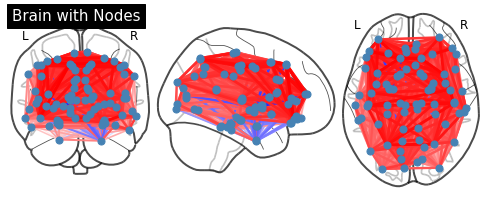

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure

# Visualització en 3D cerebral amb representació dels nodes.
plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=node_coordinates,
    node_color='steelblue',
    title='Brain with Nodes',
    display_mode='ortho',
    annotate=True,
)
plt.show()